In [1]:
from pymeasure.experiment.config import init_from_config
init_from_config('my_config.ini')
%matplotlib nbagg

04:09:06 PM: Set up console logging (pymeasure.log, INFO)
04:09:06 PM: Set up file logging (pymeasure.log, INFO)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
import numpy as np
from time import sleep
from pymeasure.experiment import (Procedure, IntegerParameter, Parameter, FloatParameter, 
                                  VectorParameter, Experiment, Measurable, get_array)
from pymeasure.instruments.mock import Mock
from pymeasure.log import get_log

mock = Mock()

class TestProcedure(Procedure):
    global mock
    
    delay = FloatParameter('Delay Time', units='s', default=0.2)
    t_max = FloatParameter('Maximum time', units='s', default=10)
    voltage = FloatParameter('Voltage', units='V', default = mock.voltage)
    timer = Measurable('Time', mock.get_time, units='s')
    wave = Measurable('Wave', mock.get_wave)
    
    def execute(self):
        mock.time = 0
        while (mock.time < self.t_max) and not(self.should_stop()):
            self.measure()
            sleep(self.delay)

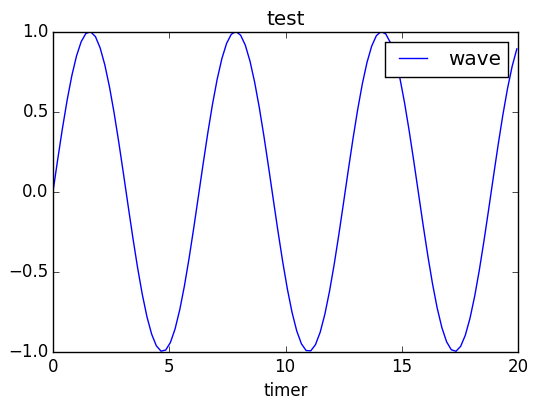

In [3]:
worker = Experiment('test', TestProcedure(delay=.2, t_max=20))
worker.start()
worker.plot_live('timer', 'wave')